# Test of Means

### Distribution of Sample Means

<pre>
•	Uncertainty intervals based on bootstrapping take advantage of modern computer power, do not require assumptions about the mathematical form of the population and do not require complex probability theory
•	Formulae derived from probability theory provide less computation and math intensive approaches
•	The mean of a random variable is called the expected value
•	Binomial distribution gives the probability of successes out of a number of trials
•	The different sizes of samples may have the same mean but the standard deviation, the standard error, the spread will vary
•	The probability distributions tend to be regular, symmetric, normal shape as the sample size increases
•	The distributions get tighter as the sample size increases
•	Understanding these distributions allows us to shift from individual data-points to the distribution of statistics
•	Previously know as the Law of Frequency of Error, Galton expressed the normal distribution as an orderly dispersion from apparent chaos
</pre>

### Standard Error

The standard error (SE) of a statistic (usually an estimate of a parameter) is the standard deviation of its sampling distribution or an estimate of that standard deviation. If the statistic is the sample mean, it is called the standard error of the mean (SEM). The sampling distribution of a mean is generated by repeated sampling from the same population and recording of the sample means obtained. This forms a distribution of different means, and this distribution has its own mean and variance. Mathematically, the variance of the sampling mean distribution obtained is equal to the variance of the population divided by the sample size. This is because as the sample size increases, sample means cluster more closely around the population mean.

https://en.wikipedia.org/wiki/Standard_error

The standard deviation reflects variability within a sample, while the standard error estimates the variability across samples of a population https://www.scribbr.com/statistics/standard-error/

### Uncertainty and Confidence Intervals

Check out the conclusion to this article: https://www.mathsisfun.com/data/confidence-interval.html

Confidence intervals are used to express how likely $\bar{x}$ falls within a range of values. If the hypothesized value falls in the tail outside of the one-directional area of interest, we reject the null hypothesis. If our hypothesized value falls outside of the two-tailed interval, we reject the null hypothesis.

In frequentist statistics, a confidence interval (CI) is a range of estimates for an unknown parameter. A confidence interval is computed at a designated confidence level. The 95% level is most common, but other levels (such as 90% or 99%) are sometimes used. The confidence level represents the long-run proportion of correspondingly computed intervals that end up containing the true value of the parameter. For example, out of all confidence intervals computed at the 95% level, 95% of them should contain the parameter's true value.

https://en.wikipedia.org/wiki/Confidence_interval

<pre>
•	Flipping a coin
•	Aleatory uncertainty – before I flip the coin
•	Epistemic uncertainty – after I flip the coint
•	Statistics are used when we have epistemic uncertainty about some quantity of a population
•	Probability provides an expected outcome but due to sampling error, we need some confidence
o	We use probability theory to tell us an interval in which we can expect the observed statistic to lie within, lets say, the central 95% of the data
o	Now pick a data-point
o	Work out the range of possible population parameters for which our statistic lies in their 95% prediction intervals – the 95% confidence interval
o	This is given the 95% label, since with repeated trials, 95% of such intervals should contain the true value
•	A confidence interval is the range of population parameters for which our observed statistic is possible
•	The exact intervals based on probability theory requires more assumptions than the bootstrap approach, the underlying population needs to be normal, and with the Central Limit Theorem, a large sample is acceptable, random samples are important
</pre>

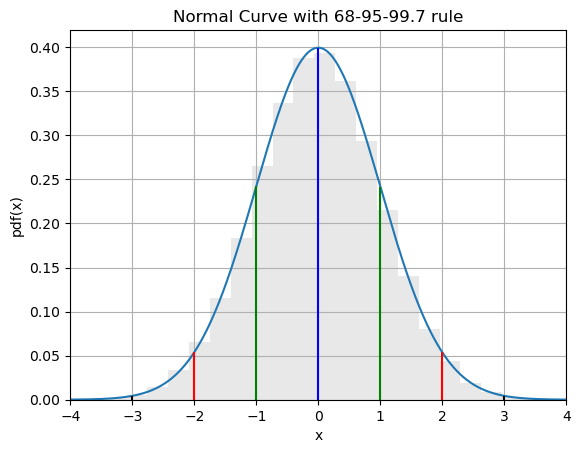

In [ ]:
# the normal curve
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

X = stats.norm.rvs(size=100000)
X.sort()

parameters = stats.norm.fit(X)
mu, sigma = parameters

fig, ax = plt.subplots()
ax.plot(X, stats.norm.pdf(X, loc=mu, scale=sigma))
ax.hist(X, bins=25, density=True, color='lightgray', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_xlim(-4, 4)
ax.grid(True)

plt.vlines(x=-3, ymin=0, ymax=stats.norm.pdf(-3, loc=mu, scale=sigma), color='black')
plt.vlines(x=-2, ymin=0, ymax=stats.norm.pdf(-2, loc=mu, scale=sigma), color='red')
plt.vlines(x=-1, ymin=0, ymax=stats.norm.pdf(-1, loc=mu, scale=sigma), color='green')
plt.vlines(x=0, ymin=0, ymax=stats.norm.pdf(0, loc=mu, scale=sigma), color='blue')
plt.vlines(x=1, ymin=0, ymax=stats.norm.pdf(1, loc=mu, scale=sigma), color='green')
plt.vlines(x=2, ymin=0, ymax=stats.norm.pdf(2, loc=mu, scale=sigma), color='red')
plt.vlines(x=3, ymin=0, ymax=stats.norm.pdf(3, loc=mu, scale=sigma), color='black')

plt.title('Normal Curve with 68-95-99.7 rule')
plt.show()

### Margin of Error

The lower bound of the confidence interval is the observed score minus the margin of error; the upper bound is the observed score plus the margin of error. The width of the confidence interval is twice the margin of error. Statistics is the discipline that helps us calculate confidence intervals.

https://www.nngroup.com/articles/confidence-interval/

<pre>
•	Simple rule of thumb
o	+ or – 100 divided by the square root of the sample size based on industry standard 1000 sample size
o	Example: if 400 prefer coffee and 600 prefer tea those who prefer coffee are 40 ± 3 or confident that 37% to 43% prefer coffee
•	Problems
o	Inevitable margin of error due to random variability
o	Sampling methods
•	Corrections
o	More data
o	Expert advice
•	What if our sample size is the population? Descriptive statistics with no margin of error, but we can make claims about underlying trends over time
•	Example: The number of homicides each day is taken from a Poisson distribution (Poisson: how many event are there on average in a given amount of time)
•	Is this trend going up
•	How can we decide if there has been real change or just unavoidable chance variation?
o	Create a 95% interval of the time period
o	If this interval contains 0, we cannot be confident that there has been real change
•	Probability theory can be used to derive the sampling distribution of summary statistics, from which the formulae for confidence intervals can be derived
•	95% (confidence interval) of cases will contain the true parameter (population) value, it cannot be claimed that a specific interval has 95% probability of containing the true parameter
•	Central Limit Theorem implies that sample means and other summary statistics can be assumed to have a normal distribution for large samples
•	Margin of errors usually do not incorporate systematic error (need expert)
•	Confidence intervals can be calculated even when we observe all the data, which then represent uncertainty about the parameters of an underlying metaphorical population
</pre>

68.18754313296228 68.55351866968434 68.95096194347076


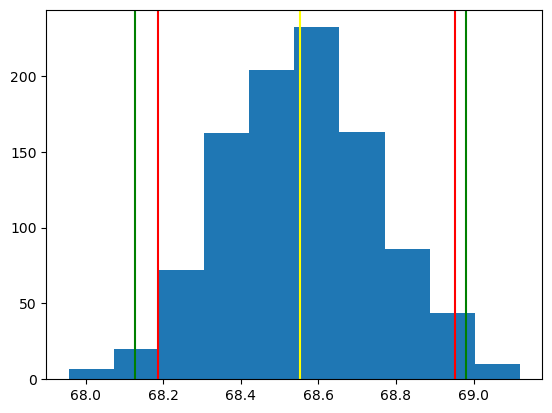

In [ ]:
# plot confidence intervals for bootstrap means 1000
import numpy as np
import matplotlib.pyplot as plt

print(np.percentile(bootstrap_means_1000, 2.5), np.mean(bootstrap_means_1000), np.percentile(bootstrap_means_1000, 97.5))
plt.hist(bootstrap_means_1000)

plt.axvline(np.mean(bootstrap_means_1000), color='yellow')
plt.axvline(np.percentile(bootstrap_means_1000, 2.5), color='red')
plt.axvline(np.percentile(bootstrap_means_1000, 97.5), color='red')
plt.axvline(cilo, color='green')
plt.axvline(cihi, color='green')

plt.show()

In [ ]:
# original sample mean
print('sample: ', coffee_sample[coffee_sample['drinks_coffee']==True]['height'].mean())
print('population: ', coffee[coffee['drinks_coffee']==True]['height'].mean())

sample:  68.55211527935421
sample:  2.292042028218947
population:  68.40021025548401


In [ ]:
import numpy as np
import scipy.stats as stats

bs_mean = np.mean(bootstrap_means_1000)
bs_std = np.std(bootstrap_means_1000)
zlo = stats.norm.ppf(.025, loc=bs_mean, scale=bs_std)
zhi = stats.norm.ppf(.975, loc=bs_mean, scale=bs_std)
se = bs_std/np.sqrt(len(bootstrap_means_1000))
moe = z * se
cilo = bs_mean - zse
cihi = bs_mean + zse
print(bs_mean)
print(bs_std)
print(zlo)
print(zhi)
print(se)
print(moe)
print(cilo)
print(np.percentile(bootstrap_means_1000, 2.5))
print(cihi)
print(np.percentile(bootstrap_means_1000, 97.5))

68.55351866968434
0.19838850561391008
68.16468434373435
68.94235299563432
0.0062735953933705695
0.4276376496894108
68.12588101999492
68.18754313296228
68.98115631937375
68.95096194347076


### Confidence Interval for Mean and Standard Deviation

* We need to know the mean and the standard deviation
* $z = \frac{x - \mu_0}{\sigma}$
* standard error = $\frac{s}{\sqrt{n}}$
* intervals with unknown σ, we use a t-interval instead of z. => $\bar{x} \pm t\frac{s}{\sqrt{n}}$
* intervals with known σ, we use a z-interval instead of t. => $\bar{x} \pm z\frac{σ}{\sqrt{n}}$

In [ ]:
# z value for confidence intervals
import numpy as np
from scipy import stats

a = 0.05 # a = 1 - 95%
print(f'z for 95%: {np.round(np.abs(stats.norm.ppf(a/2)), 3)}')

z for 95%: 1.96


https://www.mathsisfun.com/data/confidence-interval.html

There are hundreds of apples on the trees, so you randomly choose just 46 apples and get:

* a Mean of 86
* a Standard Deviation of 6.2

In [ ]:
z = np.round(np.abs(stats.norm.ppf(a/2)), 3)
mu = 86
s = 6.2
n = 46
print(mu, s, n)

ci = [mu - z * (s / np.sqrt(n)), mu + z * (s / np.sqrt(n))]
print(ci)

86 6.2 46
[84.20828534880569, 87.79171465119431]


### Permutation Test

<pre>
•	Fisher introduces Random Control Trials
•	If the observed differences always exceed what you obtain by random shuffling, then the differences can’t be due to chance
•	If random shuffling produced the observed difference less than 1 in 20 times, random error is not the cause, and there must be treatment effect (the origin of the p value < .05
•	This is the null hypothesis where if there were no treatment data would go on being generated by the same data generating mechanism
</pre>

### Test of Means

Parametric tests (has assumptions about the distribution such as mean and standard deviation)
- z-test
- t-test
- ANOVA

Non-parametric tests (does not assume anything about the distribution)
- Chi-square
- Mann-Whitney U-test
- Kruskel-Wallis H-test

#### Paramatric Tests
Is the mean of sample 1 the same as the mean of sample 2?

Please review https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/one-tailed-test-or-two/

- For a one tailed null hypothesis we see $\leq$ or $\geq$
- For a one tailed alt hypothesis we see $<$ or $>$
- For a two tailed null hypothesis we see the symbol $=$
- For a two tailed alt hypothesis we see the symbol $\ne$

**For a One Tailed Test**
- Null Hypothesis – There is no significant difference between the means of groups
- Alternate Hypothesis – There is a significant difference between the means of groups in that the mean of the group is less or greater than some x

**For a Two Tailed Test**
- Null Hypothesis – There is no significant difference between the means of groups
- Alternate Hypothesis – There is a significant difference between the means of groups either greater than x or less than x

For example,

**For a One Tailed Test**
- a null hypothesis might be $\mu_1 \geq \mu_2$,
- and the alt hypothesis would be $\mu_1 < \mu_2$

**For a Two Tailed Test**
- a null hypothesis might be $\mu_1 = \mu_2$,
- and the alt hypothesis would be $\mu_1 \ne \mu_2$

Remember, we never accept the null hypothesis, we either reject it or fail to reject it.

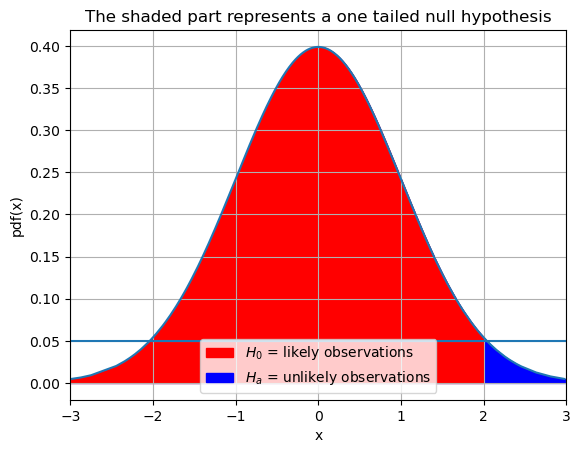

In [ ]:
# example of one tailed hypothesis
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.stats as stats

X = stats.norm.rvs(size=1000)
X.sort()
fig, ax = plt.subplots()

ax.plot(X, stats.norm.pdf(X, loc=0, scale=1))
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(-3, 2, 0.01)
ax.set_xlim(-3, 3)
full_range = np.arange(-3, 3, 0.01)
ax.fill_between(full_range, stats.norm.pdf(full_range,loc=0,scale=1), color='b')
ax.fill_between(px,stats.norm.pdf(px, loc=0, scale=1), color='r')
plt.title('The shaded part represents a one tailed null hypothesis')
red_patch = mpatches.Patch(color='red', label=f'$H_0$ = likely observations')
blue_patch = mpatches.Patch(color='blue', label=f'$H_a$ = unlikely observations')
plt.axhline(y=0.05)
plt.legend(handles=[red_patch, blue_patch])
plt.show()

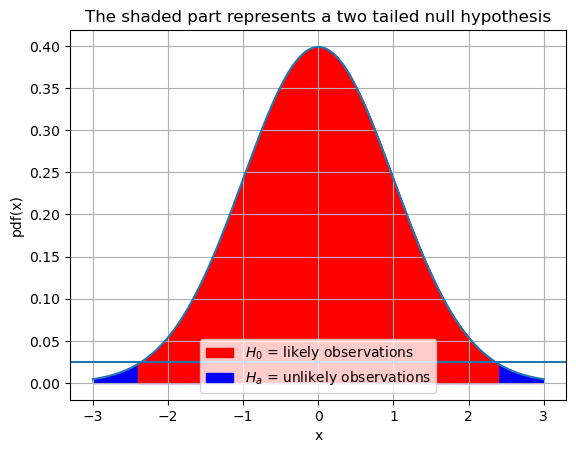

In [ ]:
# example of two tailed hypothesis
x = np.linspace(-3, 3, 1000)

fig, ax = plt.subplots()
ax.plot(x, stats.norm.pdf(x,loc=0,scale=1))
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
stds = 2.4 # how many standard deviations from the mean
full_range = np.arange(-3, 3, 0.01)
ax.fill_between(full_range, stats.norm.pdf(full_range,loc=0,scale=1), color='b')
px=np.arange(-stds,stds,0.01)
ax.fill_between(px,stats.norm.pdf(px,loc=0,scale=1), color='r')
plt.title('The shaded part represents a two tailed null hypothesis')
red_patch = mpatches.Patch(color='red', label=f'$H_0$ = likely observations')
blue_patch = mpatches.Patch(color='blue', label=f'$H_a$ = unlikely observations')
plt.axhline(y=0.025)
plt.legend(handles=[red_patch, blue_patch])
plt.show()

### Level of Significance

Level of Significance or $\alpha$ = 1 - confidence interval

A study's defined significance level, denoted by alpha, is the probability of the study rejecting the null hypothesis, given that the null hypothesis is true; and the p-value of a result, p, is the probability of obtaining a result at least as extreme, given that the null hypothesis is true. The result is statistically significant, by the standards of the study, when p is less than or equal to alpha. The significance level for a study is chosen before data collection, and is typically set to 5% or much lower—depending on the field of study. In any experiment or observation that involves drawing a sample from a population, there is always the possibility that an observed effect would have occurred due to sampling error alone. But if the p-value of an observed effect is less than (or equal to) the significance level, an investigator may conclude that the effect reflects the characteristics of the whole population, thereby rejecting the null hypothesis.

https://en.wikipedia.org/wiki/Statistical_significance

Given $\alpha = 0.05$:
- Extreme values occur in one tail of a one tail test = 5%
- Extreme values occur on both tails of a two tail test = 2.5% for each tail

These areas establish our critical values or z-scores
- For one tailed test $z = 1.645$
- For two tailed test $ z = \pm 1.960$

### Experimental Design

<pre>
The hypothesis: an idea or postulate that must be phrased as a statement of fact that can be proven false. It’s a question that is asked before knowing an answer and therefore unproven and is established to be falsified, not verified. The second part is to build a model that explains a data set.
•	Set up a question in terms of a null hypothesis that we want to check; H0
•	Choose a test statistic that estimates something that, if it runed out to be extreme enough, would lead us to doubt the null hypothesis
•	Generate the sampling distribution of this test statistic, where the null hypothesis is true
•	Check whether our observed statistic lies in the tails of this distribution and summarize this by the P-value; the probability, were the null hypothesis true, of observing such an extreme statistic. The P-value is therefore a particular tail test
•	Extreme has to be defined carefully – one tail or two tail
•	Declare the result statistically significant if the P-value is the tail area deemed more extreme than the confidence interval
•	P < 0.05 and P < 0.01 are convenient critical thresholds
</pre>

### P-value

* The p value is the evidence against a null hypothesis. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis.

Stephanie Glen. "P-Value in Statistical Hypothesis Tests: What is it?" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/p-value/

* The probability of getting a result at least as extreme as the tail area of concern, if the null hypothesis is true; a tail test

### Bonferroni Test (Correction)

https://www.investopedia.com/terms/b/bonferroni-test.asp

### Relationship Between Standard Errors, Confidence Intervals, and the P-values

<pre>
•	Confidence interval are roughly the estimate of ± 2 standard errors (1.96 or 2)
•	The standard deviation reflects variability within a sample, while the standard error estimates the variability across samples of a population
•	Does the confidence interval include the null hypothesis of 0% of no effect?
•	Is the P-value very small?
</pre>

### The Student's t-Statistic

* Developed by William Gosset in 1908 while working at the Guiness brewery
* Used to determine how far the estimate is from 0 (the mean) in respect to standard errors
* The standard deviation reflects variability within a sample, while the standard error estimates the variability across samples of a population https://www.scribbr.com/statistics/standard-error/
* Standard error of the mean (SEM) measures how far the sample mean (average) of the data is likely to be from the true population mean. The SEM is always smaller than the SD. https://www.investopedia.com/ask/answers/042415/what-difference-between-standard-error-means-and-standard-deviation.asp
* The standard deviation of sample means, is called the standard error. The standard error tells you how accurate the mean of any given sample from that population is likely to be compared to the true population mean. When the standard error increases, i.e. the means are more spread out, it becomes more likely that any given mean is an inaccurate representation of the true population mean. https://s4be.cochrane.org/blog/2018/09/26/a-beginners-guide-to-standard-deviation-and-standard-error/
* Given a t-value and the sample size, software can provide a precise p-value
* For large samples, t-values +- 2 standard errors corresponds to p-value < 0.05

### t-Test

- When we use z scores with a normal distribution, we have to know the population's standard deviation
- Student's T-Distribution developed by William Sealy Gossett while working at Guinness Brewery but couldn't use his name
- Student's t-test determines if there is a significant difference between two sets of data
- Can't just compare means due to variance and outliers
- t-test also considers sample variances


### One Sample t Test

- We don't know the population standard deviation
- Tests null hypothesis that population mean is equal to a specified $\mu$ based on a sample mean $\bar{x}$
- $H_0$: Sample mean = Population mean

t-statistic:
- $t = \frac{\bar{x} - \mu}{s/\sqrt{n}}$
- s = sample standard error

In [ ]:
# one sample t test
from scipy import stats

rvs = stats.norm.rvs(loc = 0, scale = 1, size=(100, 2))
print(stats.ttest_1samp(rvs, 5.0))

Ttest_1sampResult(statistic=array([-54.54613851, -48.9100218 ]), pvalue=array([1.12363402e-75, 3.74502352e-71]))


### Tests of Means vs Tests of Proportion

Test of means (comparing means of groups):
- $z = \frac{\bar{x} - \mu}{\sigma/\sqrt{n}}$
- z assumes we know the population standard deviation
- t is used when we don't know the population standard deviation
- $t = \frac{\bar{x1} - \bar{x2}}{s/\sqrt{n}}$

Test of proportions (saying like 75%, or most, of the time):
- $z = \frac{\hat{p} - p}{\sqrt{\frac{p (1 - p)}{n}}}$

### Test Statistics

- z-tests uses the z statistic as the test statistic
- t-tests uses the t statistic as the test statistic
- ANOVA uses the f statistic as the test statistic

### Example
- Set the level of significance
- Calculate the critical value
- Compare test statistic to the critical value

In [ ]:
# one tail vs two tail
from scipy import stats

a = 0.05
print(f'One-tailed test: {np.round(np.abs(stats.norm.ppf(a)), 3)}')
print(f'Two-tailed test: {np.round(np.abs(stats.norm.ppf(a/2)), 3)}')

One-tailed test: 1.645
Two-tailed test: 1.96


### Independent Two-Sample t-Test

- $H_0$: $\bar{x_1} = \bar{x_2}$
- Are two samples from the class equal?

t-statistic can have:
- equal sample sizes, equal variance
- unequal sample sizes, equal variance
- equal of unequal sample sizes, unequal variance (Welch's t-test)

t = signal/noise = difference in means/sample variability = $\frac{(\bar{x_1} - \bar{x_2})}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$

Compared to a t-score:
- $t$ = t-statistic
- $t_{df, \alpha}$ = t-critical
- df = degrees of freedom
- General formula for df = n1 + n2 - 2 for equal variance or
- Also see Welch-Satterthwaite Formula
- $\alpha$ = significance level

In [ ]:
# independent t test
from scipy import stats

rvs1 = stats.norm.rvs(loc = 5,scale = 10,size = 500)
rvs2 = stats.norm.rvs(loc = 5,scale = 10,size = 500)
print(stats.ttest_ind(rvs1,rvs2)) # assumes that the populations have identical variances by default

Ttest_indResult(statistic=0.6185546455193291, pvalue=0.5363509342125048)


### Correlation Tests

https://towardsdatascience.com/how-to-know-which-statistical-test-to-use-for-hypothesis-testing-744c91685a5d

* Pearson Correlation
* Spearman Rank Correlation

### t-Test Example

There are two classes of 10 students each with their course total points
- $H_0: \mu_1 \leq \mu_2$
- $H_a: \mu_1 \gt \mu_2$
- Find the mean
- Find the variance
- Compute the t-value: $\frac{(\bar{x_1} - \bar{x_2})}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$


In [ ]:
import numpy as np

# class1 = [random.randint(90, 100) for i in range(10)]
# class2 = [random.randint(83, 93) for i in range(10)]

class1 = [1184, 1203, 1219, 1238, 1243, 1204, 1269, 1256, 1156, 1248]
class2 = [1136, 1178, 1212, 1193, 1226, 1154, 1230, 1222, 1161, 1148]
print('Is the difference in means statistically different?', np.mean(class1) - np.mean(class2))

print(stats.ttest_ind(class1, class2))

Is the difference in means statistically different? 36.0
Ttest_indResult(statistic=2.2795770510504845, pvalue=0.03504505626727664)


The two means are statistically different

What about a two tailed test?

In [ ]:
print('Statistic:', stats.ttest_ind(class1, class2).statistic)
print('pValue:', stats.ttest_ind(class1, class2).pvalue/2)

Statistic: 2.2795770510504845
pValue: 0.01752252813363832


### Dependent Paired-Sample t-Test

- Used when the 2 samples are dependent
- Repeated measures
- Means of before and after learning

### The P Value Test

For a p value test:
- Get the test statistic
- Use it to determine the p-value
- Compare the p-value to the level of significance
- If the p-value is low the null must go! Reject $H_0$
- If the p-value is high the null must fly! Fail to reject $H_0$

Stephanie Glen. "P-Value in Statistical Hypothesis Tests: What is it?" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/p-value/

The lower the p value, the more predictive the feature is in principle. When we run tests, we are often concerned with the alpha level to help us reject or fail to reject the null hypothesis. The alpha level is (1 - our confidence interval), so if we wanted to have a confidence level of 95% we would use a alpha value of 5%. If our p value is less than the alpha value then the evidence points to rejecting the null hypothesis. If our p values is less than the alpha value then we can say our results are statistcally significant. We found something that is probably not the result of chance. But beware.

### SF (Survival Function)

* Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
* The survival function is a function that gives the probability that a patient, device, or other object of interest will survive past a certain time
* https://en.wikipedia.org/wiki/Survival_function

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Empirical_rule_histogram.svg/675px-Empirical_rule_histogram.svg.png' alt='normal curve' />

In [ ]:
# one tail vs two tail
import numpy as np
from scipy import stats

a = 0.05
print(f'One-tailed test: {np.round(np.abs(stats.norm.ppf(a)), 3)}')
print(f'Two-tailed test: {np.round(np.abs(stats.norm.ppf(a/2)), 3)}')

One-tailed test: 1.645
Two-tailed test: 1.96


In [ ]:
# find p value given z left tail
import scipy.stats as stats

print('z=-1.65: ', stats.norm.cdf(-1.65))
print('z=-1.64: ', stats.norm.cdf(-1.64))

stats.norm.sf(abs(-1.64))

z=-1.65:  0.0494714680336481
z=-1.64:  0.05050258347410371


0.05050258347410371

In [ ]:
# find p value given z two tail
stats.norm.sf(abs(2))*2

0.04550026389635839

### Pizza Example

Pizza delivery takes, on average, 31 minutes with a standard deviation of 7 minutes. We want faster delivery times so we provide bonuses to drivers that deliver under 30 minutes. We take a sample of size 40 of these new deliveries and find that the mean of the sample = 28. We want the confidence level to be 95%.

- State the null hypothesis: $H_0: \mu \geq 31$
- State the alternative hypothesis: $H_a: \mu \lt 31$
- Determine test type (left tail, right tail, two tail)
- Since we want an improved outcome this will be one tailed left
- $z = \frac{\bar{x} - \mu}{\sigma/\sqrt{n}}$

In [ ]:
# find test statistic from our formula
import numpy as np

test_statistic = (28 - 31) / (7/np.sqrt(40))
np.round(test_statistic, 3)

-2.711

In [ ]:
# find critical value
from scipy import stats

critical_value = stats.norm.ppf(0.05)
np.round(critical_value, 3)

-1.645

Since -2.711 < -1.645 we reject the null hypothesis.

In [ ]:
# p-value approach
import scipy.stats as stats

np.round(stats.norm.sf(abs(test_statistic)), 3)

0.003

0.003 < 0.05

## Analysis of Variance (ANOVA)

### One Way ANOVA

- https://www.statology.org/one-way-anova/
- https://www.itl.nist.gov/div898/handbook/ppc/section2/ppc231.htm
- https://en.wikipedia.org/wiki/One-way_analysis_of_variance

**Hypothesis**:
- $H_0:; \mu_1 = \mu_2 = \mu_3$
- We could test each pair
    * $H_0: \mu_1 = \mu_2, \alpha = 0.05$
    * $H_0: \mu_1 = \mu_3, \alpha = 0.05$
    * $H_0: \mu_2 = \mu_3, \alpha = 0.05$
- Overall confidence drops: .95 x .95 x .95 = .857
- ANOVA works by computing an F value and compares it to a critical value determined by our degrees of freedom which is determined by the number of groups and number of items in each group
- Considers two types of variance:
    * Between Groups: group mean varies from total mean
    * Within Groups: individual mean varies from group mean
- The F value is the ratio between these two variances

$
F = \frac{Variance Between Groups}{Variance Within Groups} = \frac{\frac{SSG}{df_{groups}}}{\frac{SSE}{df_{error}}} = \frac{\frac{SSG}{ngroups-1}}{\frac{SSE}{(n_{rows}-1)*n_{groups}}}
$

Variance revisited:
- $\frac{SS}{df} = \frac{\sum(x - \bar{x})^2}{n - 1}$

### Degrees of Freedom

https://statisticsbyjim.com/hypothesis-testing/degrees-freedom-statistics/


### Assumptions of ANOVA
- Errors are normally distributed
- Homoscedasticity or Homogeneity of variances
- Independent samples
- Continuous dependent variable

### F Distribution Used in Analysis of Variance (ANOVA)

- z and t answers the question 'What is the probability that two samples come from the same population?'
- What is the probability that two samples come from populations that have the same variance?
- What is the probability that three or more samples come from the same population?
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html
- http://pytolearn.csd.auth.gr/d1-hyptest/11/f-distro.html

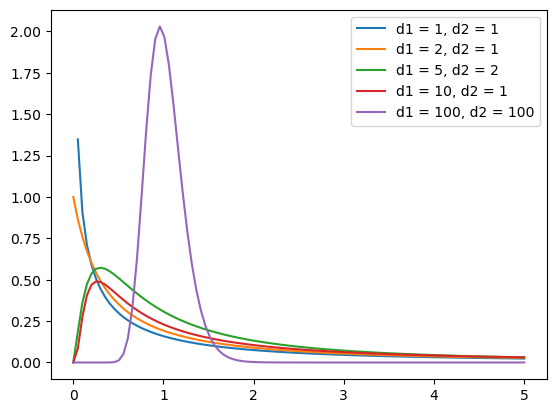

In [ ]:
# plotting f distribution pdf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

x = np.linspace(0, 5, 100)
y1 = f.pdf(x, 1, 1)
plt.plot(x, y1, label=f'd1 = 1, d2 = 1')
y2 = f.pdf(x, 2, 1)
plt.plot(x, y2, label=f'd1 = 2, d2 = 1')
y3 = f.pdf(x, 5, 2)
plt.plot(x, y3, label=f'd1 = 5, d2 = 2')
y4 = f.pdf(x, 10, 1)
plt.plot(x, y4, label=f'd1 = 10, d2 = 1')
y5 = f.pdf(x, 100, 100)
plt.plot(x, y5, label=f'd1 = 100, d2 = 100')

plt.legend();

   Group1  Group2  Group3
0      37      62      50
1      60      27      63
2      52      69      58
3      43      64      54
4      40      43      49
5      52      54      52
6      55      44      53
7      39      31      43
8      39      49      65
9      23      57      43
SSG = 25.0 + 1.0 + 16.0 = 42.0 * 10 = 420.0
df_groups = ngroups - 1 = 2
SSE = SSE1 + SSE2 + SSE3 = 3300.0
df_errors = (nrows - 1) * ngroups = 27
f statistic:  1.718
critical value:  3.354


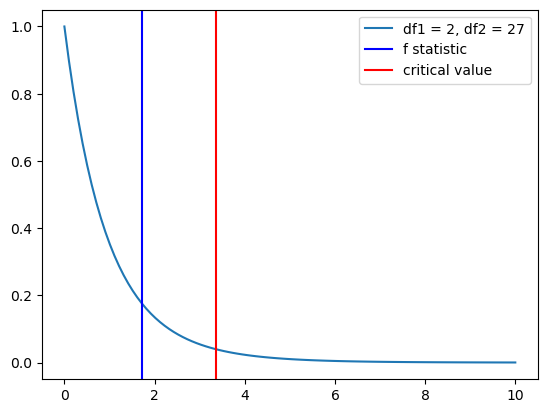

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

data = {'Group1': [37, 60, 52, 43, 40, 52, 55, 39, 39, 23],
'Group2': [62, 27, 69, 64, 43, 54, 44, 31, 49, 57],
'Group3': [50, 63, 58, 54, 49, 52, 53, 43, 65, 43]}

anova_df = pd.DataFrame(data)
print(anova_df.head(10))

# sum of squares groups
g1_mean = anova_df['Group1'].mean()
g2_mean = anova_df['Group2'].mean()
g3_mean = anova_df['Group3'].mean()
tot_mean = sum(anova_df.mean())/anova_df.shape[1]
SSG1 = (g1_mean - tot_mean)**2
SSG2 = (g2_mean - tot_mean)**2
SSG3 = (g3_mean - tot_mean)**2

SSG = (SSG1 + SSG2 + SSG3) * anova_df.shape[0]
print(f'SSG = {SSG1} + {SSG2} + {SSG3} = {SSG1 + SSG2 + SSG3} * {anova_df.shape[0]} = {SSG}')
df_groups = anova_df.shape[1] - 1
print(f'df_groups = ngroups - 1 = {df_groups}')

# sum of squares error
SSE1 = [(i - g1_mean)**2 for i in anova_df['Group1']]
SSE2 = [(i - g2_mean)**2 for i in anova_df['Group2']]
SSE3 = [(i - g3_mean)**2 for i in anova_df['Group3']]

SSE = sum(SSE1 + SSE2 + SSE3)
print(f'SSE = SSE1 + SSE2 + SSE3 = {SSE}')
df_errors = (anova_df.shape[0] - 1) * anova_df.shape[1]
print(f'df_errors = (nrows - 1) * ngroups = {df_errors}')

# get f statistic
f_stat = (SSG/df_groups)/(SSE/df_errors)
print('f statistic: ', np.round(f_stat, 3))

cv = stats.f.ppf(q=1-.05, dfn=2, dfd=27)
print('critical value: ', np.round(cv, 3))

# visualize with plot
x = np.linspace(0, 10, 100)
y = stats.f.pdf(x, df_groups, df_errors)
plt.plot(x, y, label=f'df1 = {df_groups}, df2 = {df_errors}')
plt.axvline(x=f_stat, color='b', label='f statistic')
plt.axvline(x=cv, color='r', label='critical value')

plt.legend();

Since f is lest than $f_{critical}$, or 1.718 < 3.354, we fail to reject the hypothesis. We don't have enough evidence to show there are differences between the groups.

### Two Way ANOVA

- Tests two independent variables at the same time
- Rows are organized as blocks
- Goal is to isolate and remove any variance contributed by the blocks, to better understand the variance in the groups


        Group1  Group2
Block                 
Block1       8      11
Block2      10      12
Block3      12      13
SSG = (SSG1 + SSG2) * nblocks = 2.0 * 3 = 6.0

        Group1  Group2  BlockMeans
Block                             
Block1       8      11         9.5
Block2      10      12        11.0
Block3      12      13        12.5

Total Mean: 11.0
SSB = 9.0
SST = 16.0
SSE = SST - SSG - SSB = 1.0
df_groups = 1
df_errors = 2
f statistic = 12.0
critical value = 18.513


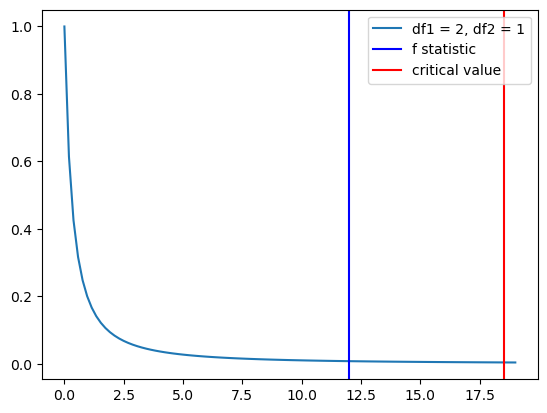

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# set up two way df
data = {'Block': ['Block1', 'Block2', 'Block3' ], 'Group1': [8, 10, 12], 'Group2': [11, 12, 13]}
two_way_df = pd.DataFrame(data)
two_way_df.set_index('Block', inplace=True)
print(two_way_df.head())

# sum of squares groups
g1_mean = two_way_df['Group1'].mean()
g2_mean = two_way_df['Group2'].mean()
tot_mean = sum(two_way_df.mean())/two_way_df.shape[1]
SSG1 = (g1_mean - tot_mean)**2
SSG2 = (g2_mean - tot_mean)**2

SSG = (SSG1 + SSG2) * two_way_df.shape[0]
print(f'SSG = (SSG1 + SSG2) * nblocks = {SSG1 + SSG2} * {two_way_df.shape[0]} = {SSG}\n')

# add block means
two_way_df['BlockMeans'] = two_way_df.mean(axis=1)
print(two_way_df.head())

# total mean
tot_mean = sum(two_way_df.mean())/two_way_df.shape[1]
print('\nTotal Mean:', tot_mean)

# sum of squares block
SSB = sum([(i - tot_mean)**2 for i in two_way_df['BlockMeans']]) * 2
print(f'SSB = {SSB}')

# sum of squares total
SST = sum(sum([(i[1] - tot_mean)**2 for i in two_way_df.drop('BlockMeans', axis=1).iterrows()]))
print('SST =', SST)

# SSE
SSE = SST - SSG - SSB
print(f'SSE = SST - SSG - SSB = {SSE}')

# degrees of freedom
df_groups = two_way_df.drop('BlockMeans', axis=1).shape[1] - 1
print(f'df_groups = {df_groups}')

# df_errors changes to allow for SSB
df_errors = (two_way_df.drop('BlockMeans', axis=1).shape[0] - 1) * (two_way_df.drop('BlockMeans', axis=1).shape[1] - 1)
print(f'df_errors = {df_errors}')

f_stat = (SSG/df_groups)/(SSE/df_errors)
print(f'f statistic = {f_stat}')

cv = stats.f.ppf(1 - .05, dfn=df_groups, dfd=df_errors)
print('critical value =', np.round(cv, 3))

# visualize with plot
x = np.linspace(0, 19, 100)
y = stats.f.pdf(x, df_errors, df_groups)
plt.plot(x, y, label=f'df1 = {df_errors}, df2 = {df_groups}')
plt.axvline(x=f_stat, color='b', label='f statistic')
plt.axvline(x=cv, color='r', label='critical value')

plt.legend();

### More ANOVA

- Two-Way ANOVA with replication
- ANCOVA
- MANOVA
- MANCOVA

http://www.statsmakemecry.com/smmctheblog/stats-soup-anova-ancova-manova-mancova

### Feature Selection with ANOVA

In [ ]:
# get data
import pandas as pd
from sklearn.model_selection import train_test_split

grades = pd.read_csv('class-grades.csv', index_col=False)
grades.drop(['Quiz', 'Student', 'Attendance'], axis=1, inplace=True)
print(grades.shape)
print(grades.head())

X_train, X_test, y_train, y_test = train_test_split(grades.drop('FinalGrade', axis=1), grades['FinalGrade'], test_size=.2, random_state=42)

X_train['Assignment'].fillna(X_train['Assignment'].round(decimals=2).median(), inplace=True)
X_train['Tutorial'].fillna(X_train['Tutorial'].round(decimals=2).mode()[0], inplace=True)
X_train['Midterm'].fillna(X_train['Midterm'].round(decimals=2).mean(), inplace=True)
X_train['Final'].fillna(X_train['Final'].round(decimals=2).mean(), inplace=True)
X_train['Activity 2'].fillna(X_train['Activity 2'].round(decimals=2).mean(), inplace=True)

X_test['Assignment'].fillna(X_train['Assignment'].round(decimals=2).median(), inplace=True)
X_test['Tutorial'].fillna(X_train['Tutorial'].round(decimals=2).mode()[0], inplace=True)
X_test['Midterm'].fillna(X_train['Midterm'].round(decimals=2).mean(), inplace=True)
X_test['Final'].fillna(X_train['Final'].round(decimals=2).mean(), inplace=True)
X_test['Activity 2'].fillna(X_test['Activity 2'].round(decimals=2).mean(), inplace=True)
print(X_train.shape, X_test.shape)
print(X_train.info())

(98, 8)
   Prefix  Assignment  Tutorial  Midterm  Final  FinalGrade  Activity 1  \
0       5       57.14     34.09    64.38  52.50          54       79.46   
1       8       95.05    105.49    67.50  68.33          81       27.37   
2       8       83.70     83.17    30.00  48.89          55        2.50   
3       7       81.22     96.06    49.38  80.56          71       74.14   
4       8       91.32       NaN    95.00  73.89          89       83.36   

   Activity 2  
0         NaN  
1         NaN  
2       13.57  
3         NaN  
4         NaN  
(78, 7) (20, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 49 to 51
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Prefix      78 non-null     int64  
 1   Assignment  78 non-null     float64
 2   Tutorial    78 non-null     float64
 3   Midterm     78 non-null     float64
 4   Final       78 non-null     float64
 5   Activity 1  78 non-null     float6

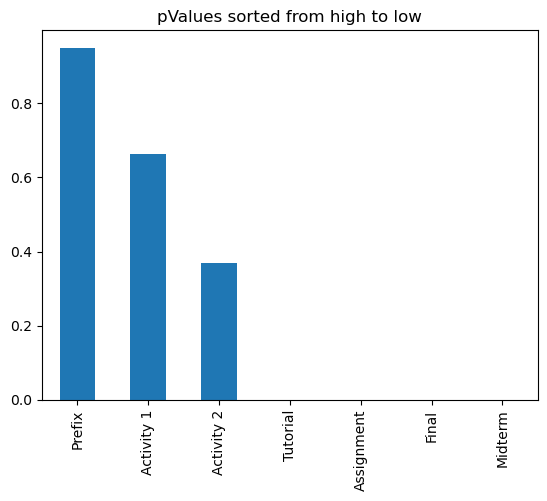

In [ ]:
# identify best features using f_regression and pvalues
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectPercentile

model = f_regression(X_train, y_train)
model = pd.Series(model[1])
model.index = X_train.columns
plt.title('pValues sorted from high to low')
model.sort_values(ascending=False).plot.bar();

In [ ]:
# keep best percentage of features (lowest p values)
keepers = SelectPercentile(f_regression, percentile=60).fit(X_train, y_train)
X_train.columns[keepers.get_support()]

Index(['Assignment', 'Tutorial', 'Midterm', 'Final'], dtype='object')

## Chi Square

### Chi Square Distribution

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html

Degrees of Freedom:<br />
https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/degrees-of-freedom/

* Right skewed
* Approaches normal the larger the df

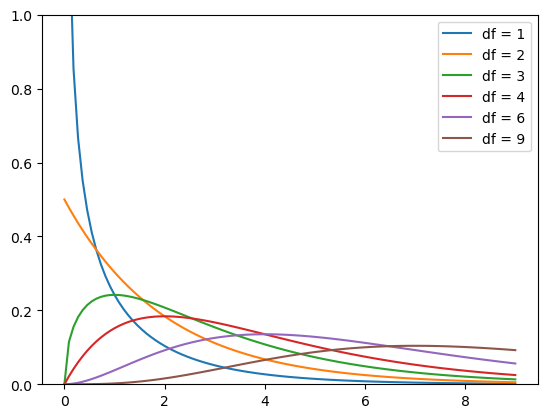

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

x = np.linspace(0, 9, 100)
plt.plot(x, chi2(1).pdf(x), label=f'df = 1')
plt.plot(x, chi2(2).pdf(x), label=f'df = 2')
plt.plot(x, chi2(3).pdf(x), label=f'df = 3')
plt.plot(x, chi2(4).pdf(x), label=f'df = 4')
plt.plot(x, chi2(6).pdf(x), label=f'df = 6')
plt.plot(x, chi2(9).pdf(x), label=f'df = 9')
plt.ylim(0, 1)

plt.legend();

### Chi-Square Test ($\chi^2$)

- Goodness of fit
- How much does the observed results vary from the expected results
- Probability of an observed event given what is expected
- If we roll a die 24 times and 6 comes up 10 times, is this chance or the die is loaded?
- Chi-square squares the distances between the observed value and the expected value divided by the expected value
- $\chi^2 = \sum\frac{(O - E)^2}{E}$

Example:
- We flip a coin 18 times and heads comes up 12 times
- Expected value: 18 / 2 = 9
- $\chi^2 = \sum\frac{(O - E)^2}{E} = \frac{(12 - 9)^2}{9} + \frac{(6 - 9)^2}{9}$ = 2
- $\chi^2$ on the x axis and p-value on the y axis
- Low $\chi^2$ means a high correlation between observed and expected values
- $H_0$: 12 heads out of 18 flips is fair with 95% probability


Statistic value: 2.0, p-value: 0.15729920705028105
Critical value: 3.841458820694124


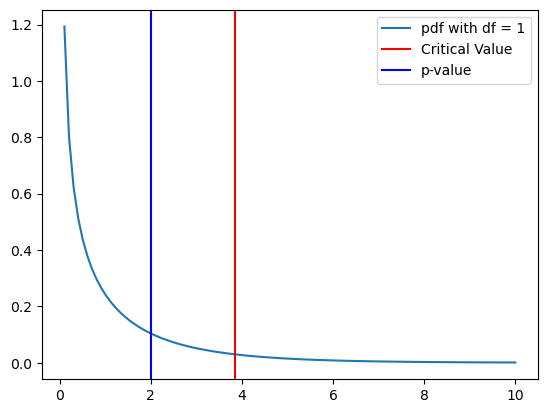

In [ ]:
# visualize with plot
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.stats import chisquare

sv, pv = chisquare([12, 6], [18 * 0.5, 18 * 0.5]) # statistic value, p value
print(f'Statistic value: {sv}, p-value: {pv}')
cv = chi2.ppf(1-.05, df=1) # critical value
print(f'Critical value: {cv}')
x = np.linspace(0, 10, 100)
y = chi2(1).pdf(x)
plt.plot(x, y, label=f'pdf with df = 1')
plt.axvline(x=np.round(cv, 3), color='r', label=f'Critical Value')
plt.axvline(x=np.round(sv, 3), color='b', label='p-value')

plt.legend();

### Feature Selection with $\chi^2$

Index(['Midterm', 'Final', 'Activity 1', 'Activity 2'], dtype='object')


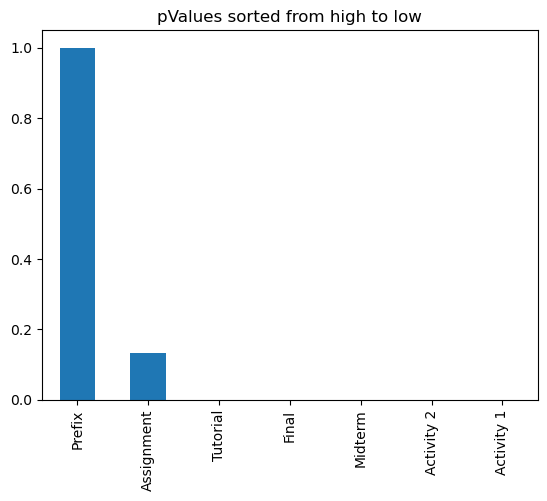

In [ ]:
# get libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectPercentile

model = chi2(X_train, y_train)
model = pd.Series(model[1])
model.index = X_train.columns
plt.title('pValues sorted from high to low')
model.sort_values(ascending=False).plot.bar();

keepers = SelectPercentile(chi2, percentile=60).fit(X_train, y_train)
print(X_train.columns[keepers.get_support()])